# A Brief Analysis of the 2020 Stack Overflow Developer Survey Data
## Part 3

## 1. Business Understanding
I am conducting an analysis on the 2020 Stack Overflow Developer Survey Data to answer the following question:

a. What are the most popular programming languages? 

b. What are the most popular programming languages in the different size of organizations?

To get started, let's read in the necessary libraries and the CSV file of the raw data of the survey:

In [186]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
%matplotlib inline

df = pd.read_csv('Data/developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## 2. Data Understanding

To understand how many attributes (columns) and records (rows) the survey results have, I'll use (shape). The dataset has 61 attributes and 64,461 records:

In [121]:
# Return the dimensionality of the data frame
df.shape

(64461, 61)

Now let's list all attributes:

In [122]:
# Evaluate the appropriateness of a column
df_18['LanguageWorkedWith'].isna().mean()*100

20.758686965757928

In [123]:
# Get a list of all column names
list(df.columns) 

['Respondent',
 'MainBranch',
 'Hobbyist',
 'Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Sexuality',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

The 2 columns that we will use in this analysis are: LanguageWorkedWith and LanguageDesireNextYear. Let's take a look at their types and values:

In [124]:
# Print thre data types using (dtypes[])

print('LanguageWorkedWith data type is:',df.dtypes['LanguageWorkedWith'])
print('LanguageDesireNextYear data type is:',df.dtypes['LanguageDesireNextYear'])

LanguageWorkedWith data type is: object
LanguageDesireNextYear data type is: object


In [125]:
df['LanguageWorkedWith'].value_counts() 

HTML/CSS;JavaScript;PHP;SQL                                                                        1073
HTML/CSS;JavaScript                                                                                 900
C#;HTML/CSS;JavaScript;SQL                                                                          856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                               754
HTML/CSS;JavaScript;TypeScript                                                                      697
                                                                                                   ... 
Bash/Shell/PowerShell;C;C#;C++;Dart;HTML/CSS;Java;JavaScript;Objective-C;Python;Rust;TypeScript       1
Java;JavaScript;Kotlin;Rust;SQL                                                                       1
C#;Haskell;HTML/CSS;JavaScript;TypeScript                                                             1
Java;JavaScript;Perl;Python;Scala;TypeScript                    

In [126]:
df['LanguageDesireNextYear'].value_counts() 

Python                                                                                                  1152
Rust                                                                                                     528
HTML/CSS;JavaScript;TypeScript                                                                           499
C#                                                                                                       461
Go                                                                                                       412
                                                                                                        ... 
Rust;Scala;SQL;Swift                                                                                       1
C;Haskell;Python;Rust;SQL;TypeScript                                                                       1
Bash/Shell/PowerShell;C#;SQL;Swift;TypeScript                                                              1
Bash/Shell/PowerShe

## 3. Data Preparation
Let's fit the data by cleaning it up. We have a lot of null values in the 3 columns we are intersted in. Therefore, I'll drop all null values . Out of the 64,461 records that we started with, we are lift with 53,712. Still, this is a good number of records for the analysis:

In [127]:
# How much of the column has null values
df['LanguageWorkedWith'].isna().mean()*100 

10.988039279564388

In [128]:
# How much of the column has null values
df['LanguageDesireNextYear'].isna().mean()*100

16.053117388808737

In [129]:
# Remove all null values
df.dropna(subset=['LanguageWorkedWith', 'LanguageDesireNextYear'], inplace= True)
df.shape

(53712, 61)

In [130]:
# Values saved in both columns are lists of languages separated by semicolons. We must read each record one by one, 
# and save the languages and their counts in a dictionary 
def split_items(df, ColumnName):

    languages_list = df[df[ColumnName].notnull()]
    unique_languages = {}

    # split the languages on ;
    for language_set in languages_list[ColumnName].apply(lambda row: str(row).split(';')):
        for language in language_set:
            if language not in unique_languages.keys():
                unique_languages[language] = 1
            else:
                unique_languages[language] += 1
    return unique_languages    

## 4. Modeling

In [136]:
# This function takes the dictionary of languages and plot title and plot a horizontal bar chart
def plot_df(unique_languages, plot_title):
    """ 
    INPUT
    unique_languages - dictionary of the languages
    plot_title - The title that will be displayed on the top of the graph
    
    OUTPUT
    A horizontal bar chart
            
    """
    unique_languages = pd.DataFrame.from_dict(unique_languages, orient='index', dtype=None)
    unique_languages.columns = ['Count']
    unique_languages.sort_values('Count',ascending=True,inplace=True)

    unique_languages.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

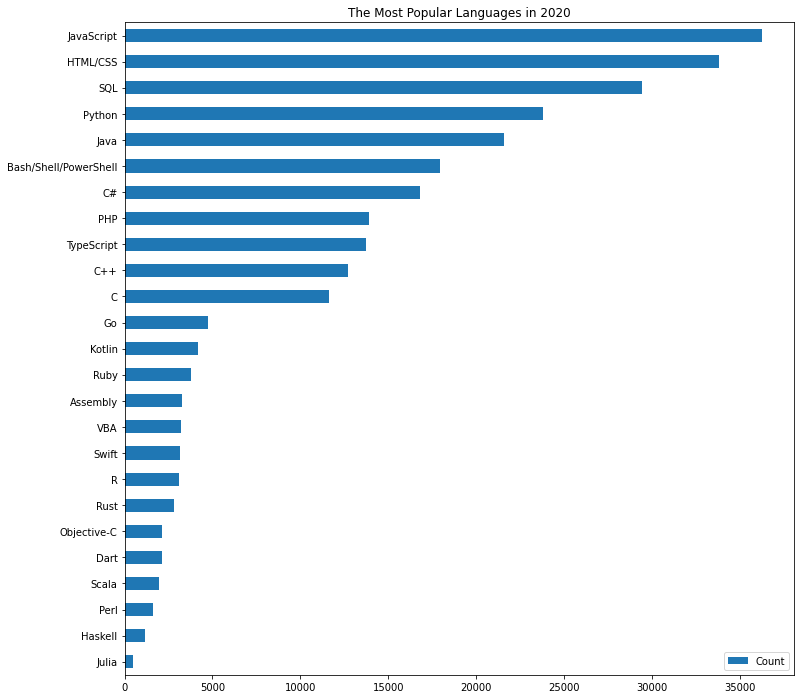

In [137]:
unique_languages = split_items(df,'LanguageWorkedWith')
plot_df(unique_languages,'The Most Popular Languages in 2020')

In [138]:
# This function takes the data frame and the column names, and returns 3 data frames
# The reason why I'm sending the column names is that I used this function on several surveys of different years. The column 
# names from one year to another are not consistant

def compare_languages(df, CurrentLanguages, FutureLanguages):
    '''
    INPUT
    df - Data frame
    CurrentLanguages - The column name of the languages that developers used
    FutureLanguages - The column name of the languages that developers want to use next year
    
    OUTPUT
    compare_df - A data frame of the languages, the count of devlopers used them this year, 
                and the count of developers want to use them next year
    languages_df - A data frame of the languages, the count of devlopers used them this year only
    languages_df_future - A data frame of the languages, the count of devlopers want to use them next year
    
    '''
    # List all the programming languages developeres worked with this year
    unique_languages = split_items(df, CurrentLanguages)
    
    # List all the programming languages developeres want to work with in the future
    unique_future_languages = split_items(df, FutureLanguages)

    # Craete a dataframe of the languages 
    columns1 = ['Language', 'Worked with']
    languages_df = pd.DataFrame(list(unique_languages.items()),columns=columns1) 

    columns2 = ['Language', 'Want to work with']
    languages_df_future = pd.DataFrame(list(unique_future_languages.items()),columns=columns2) 
    
    compare_df = pd.merge(languages_df, languages_df_future, on='Language')
    compare_df.sort_values(by=['Worked with'], inplace=True, ascending=False)
    compare_df.set_index('Language', inplace=True)
   
    return compare_df, languages_df, languages_df_future

In [213]:
# This function takes the data frame and plot title and plot a bar chart
def plot_df_all(df,plot_title):
    '''
    INPUT
    df - The data frame to be plotted
    plot_title - The title that will be displayed on the top of the graph
    
    OUTPUT
    A bar chart
    '''

    (df/df.sum()).plot(kind='bar', title=plot_title, figsize=(12,8))
    return 

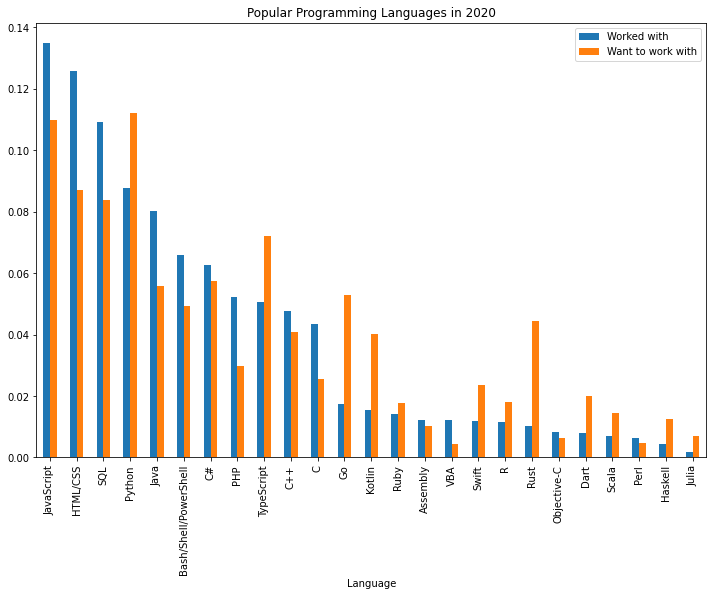

In [218]:
# Create data frames of the popular languages then plot them
compare_df, languages_df, languages_df_future = compare_languages(df, 'LanguageWorkedWith', 'LanguageDesireNextYear')
plot_df_all(compare_df, 'Popular Programming Languages in 2020')

### Part a is completed. Now we move to Part b of this analysis to answer the question: 
b. What are the most popular programming languages in the different size of organizations?


In [227]:
# Let's start with dropping all null values in column: OrgSize
df.dropna(subset=['OrgSize'], inplace= True)
df.shape


(44334, 61)

In [228]:
# This function takes the OrgSize, assign a label and returns the matching label 

def label_org_size (OrgSize):
    '''
    INPUT
    OrgSize - Object of the organization size
    
    OUTPUT
    Object of the label of the organization size
    '''
    if OrgSize in(['2 to 9 employees','10 to 19 employees']):
        return 'Micro'
    if OrgSize in(['20 to 99 employees','100 to 499 employees']):
        return 'Small'
    if OrgSize in(['500 to 999 employees','1,000 to 4,999 employees']):
        return 'Medium'
    if OrgSize in(['5,000 to 9,999 employees','10,000 or more employees']):
        return 'Large' 
    if OrgSize in(['Just me - I am a freelancer, sole proprietor, etc.']):
        return 'Single'

In [229]:
# Add a new column (OrgSizeLabel) to the data frame that has the category we decided to use

df['OrgSizeLabel'] = df.apply(lambda x: label_org_size(x['OrgSize']), axis=1) 

In [233]:
# Drop the Single labeled records since they won't add much value to the analysis: 
# a single person is expected to make the decision when purchasing new tech

df.drop(df[df['OrgSizeLabel'] == 'Single'].index, inplace=True)
df['OrgSizeLabel'].value_counts() 

Small     17908
Micro      8536
Large      7957
Medium     7743
Name: OrgSizeLabel, dtype: int64

## 4. Modeling

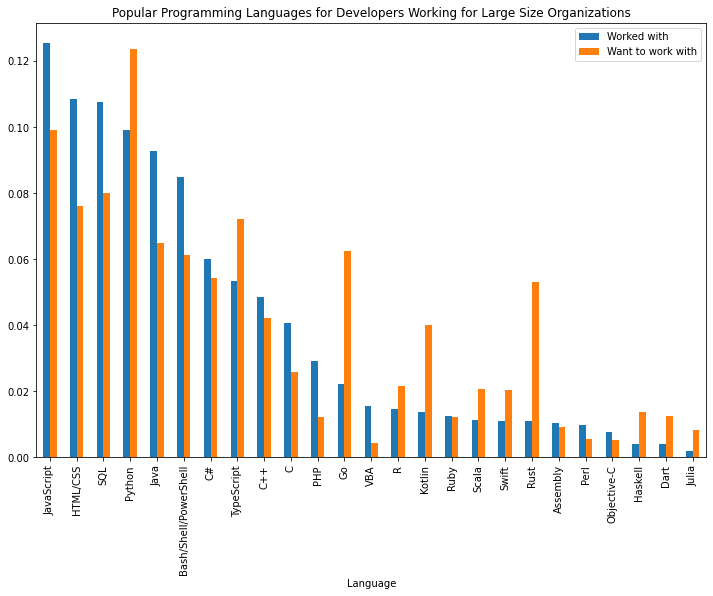

In [234]:
# Copy the records of large size organization to a new data frame 
df_LargeOrg = df[df['OrgSizeLabel'] == 'Large']

# Create a data frame of used and wanted languages in large orgs
compare_df_LargeOrg, languages_df_LargeOrg, languages_df_future_LargeOrg = compare_languages(df_LargeOrg, 'LanguageWorkedWith', 'LanguageDesireNextYear')

# The final step is to plot the data frame
plot_df_all(compare_df_LargeOrg, 'Popular Programming Languages for Developers Working for Large Size Organizations')

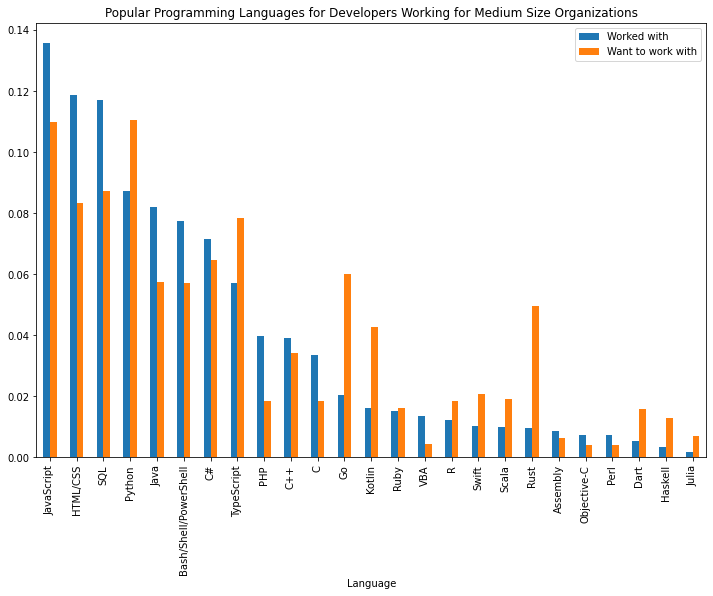

In [235]:
# Copy the records of medium size organization to a new data frame 
df_MediumOrg = df_OrgSize[df_OrgSize['OrgSizeLabel'] == 'Medium']

# Create a data frame of used and wanted languages in medium orgs
compare_df_MediumOrg, languages_df_MediumOrg, languages_df_future_MeduimOrg = compare_languages(df_MediumOrg, 'LanguageWorkedWith', 'LanguageDesireNextYear')

# The final step is to plot the data frame
plot_df_all(compare_df_MediumOrg, 'Popular Programming Languages for Developers Working for Medium Size Organizations')

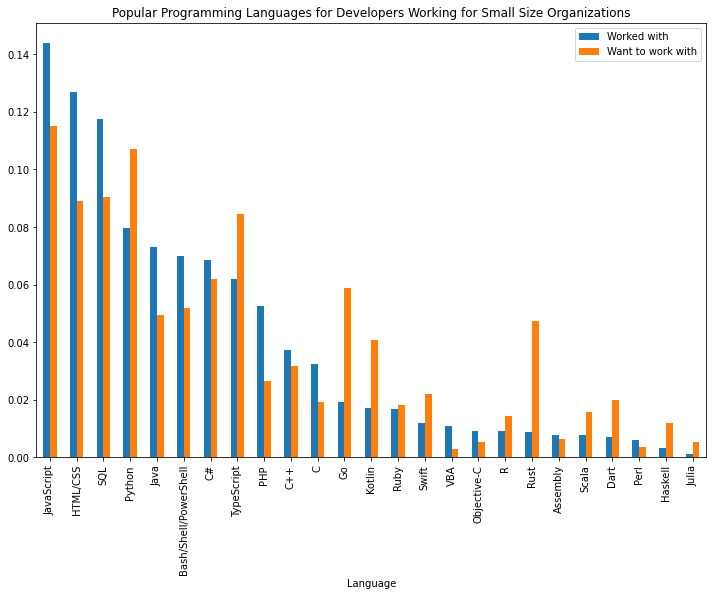

In [236]:
# Copy the records of small size organization to a new data frame 
df_SmallOrg = df_OrgSize[df_OrgSize['OrgSizeLabel'] == 'Small']

# Create a data frame of used and wanted languages in small orgs
compare_df_SmallOrg, languages_df_SmallOrg, languages_df_future_SmallOrg = compare_languages(df_SmallOrg, 'LanguageWorkedWith', 'LanguageDesireNextYear')

# The final step is to plot the data frame
plot_df_all(compare_df_SmallOrg, 'Popular Programming Languages for Developers Working for Small Size Organizations')

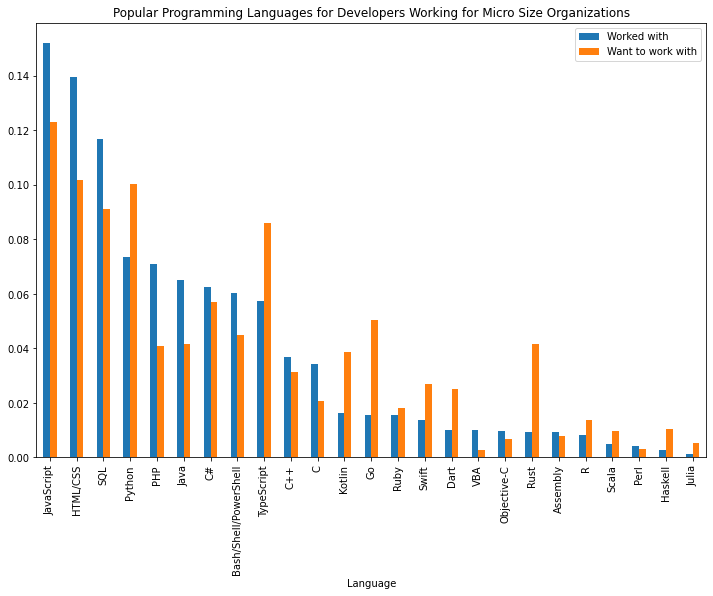

In [237]:
# Copy the records of micro size organization to a new data frame 
df_MicroOrg = df_OrgSize[df_OrgSize['OrgSizeLabel'] == 'Micro']

# Create a data frame of used and wanted languages in micro orgs
compare_df_MicroOrg, languages_df_MicroOrg, languages_df_future_MicroOrg = compare_languages(df_MicroOrg, 'LanguageWorkedWith', 'LanguageDesireNextYear')

# The final step is to plot the data frame
plot_df_all(compare_df_MicroOrg, 'Popular Programming Languages for Developers Working for Micro Size Organizations')

## 5. Evaluation & 6. Deployement
The complete analysis can be found in the Medium page here.